<a href="https://colab.research.google.com/github/deepakbhat7259/Dimensionality-Reduction-in-Python/blob/master/Copy_of_SVM_classification_for_Indian_Pines_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.	Import Libraries

In [ ]:
import plotly.express as px       #   Plotly Express is a terse, consistent, high-level API for creating figures.
import matplotlib.pyplot as plt   #   matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB.
import numpy as np                #   The fundamental package for scientific computing with Python
#sns.axes_style('whitegrid');
from sklearn.preprocessing import StandardScaler      # Standardize features by removing the mean and scaling to unit variance.
from sklearn.model_selection import train_test_split  # Split arrays or matrices into random train and test subsets.
from sklearn.svm import SVC                           # C-Support Vector Classification.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sn                                  # Seaborn is a Python data visualization library based on matplotlib.


2.	Download HSI Data

In [ ]:
!wget http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat

--2024-04-10 06:16:10--  http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat [following]
--2024-04-10 06:16:10--  https://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5953527 (5.7M)
Saving to: ‘Indian_pines_corrected.mat’

Indian_pines_correc 100%[===================>]   5.68M  2.21MB/s    in 2.6s    

2024-04-10 06:16:14 (2.21 MB/s) - ‘Indian_pines_corrected.mat’ saved [5953527/5953527]

URL transformed to HTTPS due to an HSTS policy
--2024-04-10 06:16:14--  https://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat
Connecting to www.ehu.eus (www.e

In [ ]:
!ls

Indian_pines_corrected.mat  Indian_pines_gt.mat  sample_data


3.	Read the Data

In [ ]:
from scipy.io import loadmat        # SciPy is a scientific computation library that uses NumPy underneath. SciPy stands for Scientific Python.
def read_HSI():               # Defining a function called read_HSI()
  X = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']              # Load the corrected.mat file to X.
  y = loadmat('Indian_pines_gt.mat')['indian_pines_gt']                            # Load the groundtruth.mat file to y.
  print(f"X shape: {X.shape}\n y shape: {y.shape}")                                # Display teh size of X and y.
  return X, y                                                                      # Return the size of X and y.

X, y = read_HSI()                                                                  # Calling the function.


X shape: (145, 145, 200)
 y shape: (145, 145)


4.	Visualize Bands

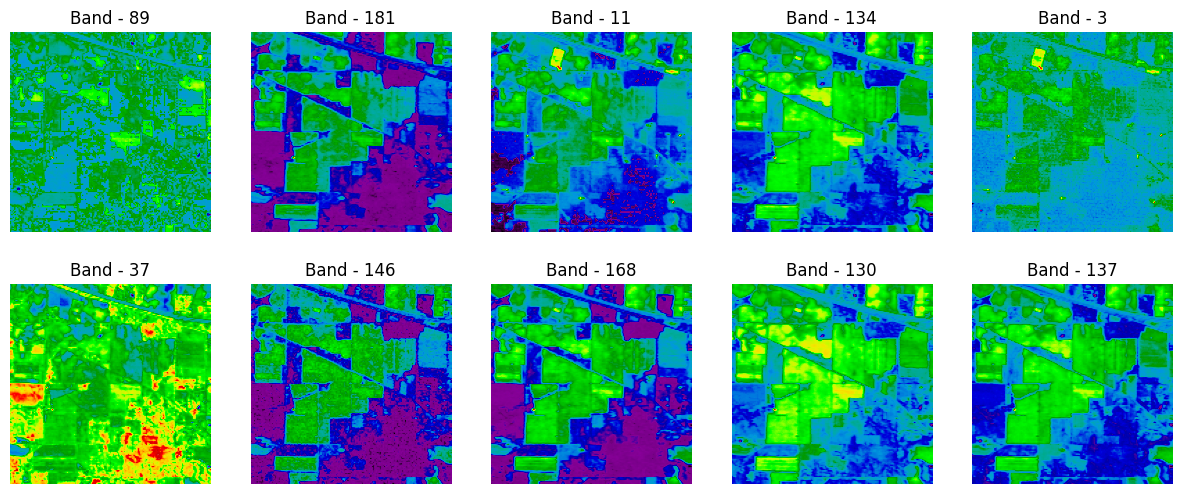

In [ ]:
fig = plt.figure(figsize = (15, 6))        # figsize is a tuple of the width and height of the figure in inches.
for i in range(1, 1+10):
    fig.add_subplot(2,5, i)                # add_subplot(nrows, ncols, index, **kwargs)
    q = np.random.randint(X.shape[2])      # NumPy.random.randint(): function used to return random integers from the values specified with low (inclusive) to high (exclusive) param.
    plt.imshow(X[:,:,q], cmap='nipy_spectral')  # The nipy_spectral() function in pyplot module of matplotlib library is used to set the colormap to “nipy_spectral”.
    plt.axis('off')                        # To hide the axes, use plt.axis('off')
    plt.title(f'Band - {q}')
plt.savefig('IP_Bands.png')


5.	Visualize the Ground Truth

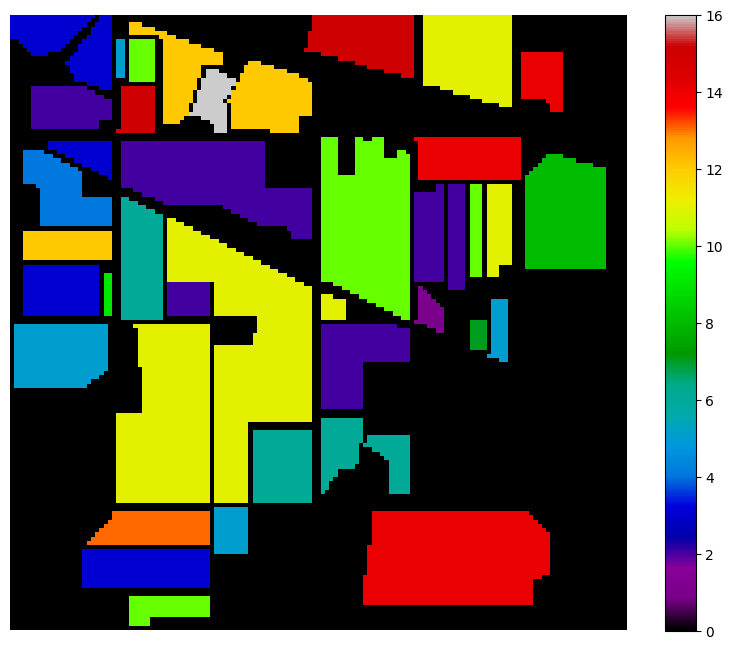

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(y, cmap='nipy_spectral')  # The set_cmap() function is used to set the default colormap, and applies it to the current image if any.
plt.colorbar()                       # The colorbar() function in pyplot module of matplotlib adds a colorbar to a plot indicating the color scale.
plt.axis('off')                      #  The matplotlib.pyplot.axis('off') command us used to hide the axis(both x-axis & y-axis)
plt.savefig('IP_GT.png')
plt.show()


6.	Convert the dataset into csv

In [ ]:
import pandas as pd
import numpy as np
def extract_pixels(X, y):
  q = X.reshape(-1, X.shape[2])     # reshape() function allows us to reshape an array in Python
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  df.to_csv('Dataset.csv')
  return df
df = extract_pixels(X, y)


In [ ]:
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band192,band193,band194,band195,band196,band197,band198,band199,band200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21025 entries, 0 to 21024
Columns: 201 entries, band1 to class
dtypes: uint16(200), uint8(1)
memory usage: 8.0 MB


In [ ]:
df.iloc[:, :-1].describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band191,band192,band193,band194,band195,band196,band197,band198,band199,band200
count,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,...,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000
mean,2957.363472,4091.321237,4277.502259,4169.956671,4516.678668,4790.595149,4848.317574,4714.732509,4668.904828,4439.065541,...,1079.310773,1061.927848,1060.210273,1063.276813,1050.048514,1040.201141,1043.370321,1030.194816,1015.571463,1008.513579
std,354.918708,230.390005,257.827640,280.761254,346.035984,414.382138,469.247667,491.728349,533.232855,539.908195,...,49.943791,38.843805,38.712195,41.920969,34.242725,26.452672,29.794418,20.865106,11.386402,7.050921
min,2560.000000,2709.000000,3649.000000,2810.000000,3840.000000,4056.000000,4004.000000,3865.000000,3775.000000,2792.000000,...,998.000000,998.000000,999.000000,999.000000,993.000000,990.000000,992.000000,989.000000,986.000000,981.000000
25%,2602.000000,3889.000000,4066.000000,3954.000000,4214.000000,4425.000000,4421.000000,4263.000000,4173.000000,3940.000000,...,1031.000000,1026.000000,1024.000000,1024.000000,1019.000000,1016.000000,1016.000000,1012.000000,1006.000000,1004.000000
50%,2780.000000,4106.000000,4237.000000,4126.000000,4478.000000,4754.000000,4808.000000,4666.000000,4632.000000,4404.000000,...,1068.000000,1053.000000,1052.000000,1054.000000,1043.000000,1033.000000,1035.000000,1026.000000,1014.000000,1009.000000
75%,3179.000000,4247.000000,4479.000000,4350.000000,4772.000000,5093.000000,5198.000000,5100.000000,5084.000000,4860.000000,...,1129.000000,1099.000000,1098.000000,1104.000000,1083.000000,1066.000000,1072.000000,1050.000000,1024.000000,1014.000000
max,4536.000000,5744.000000,6361.000000,6362.000000,7153.000000,7980.000000,8284.000000,8128.000000,8194.000000,7928.000000,...,1364.000000,1287.000000,1289.000000,1315.000000,1258.000000,1201.000000,1245.000000,1167.000000,1076.000000,1036.000000


7.	Principal Component Analysis(PCA)

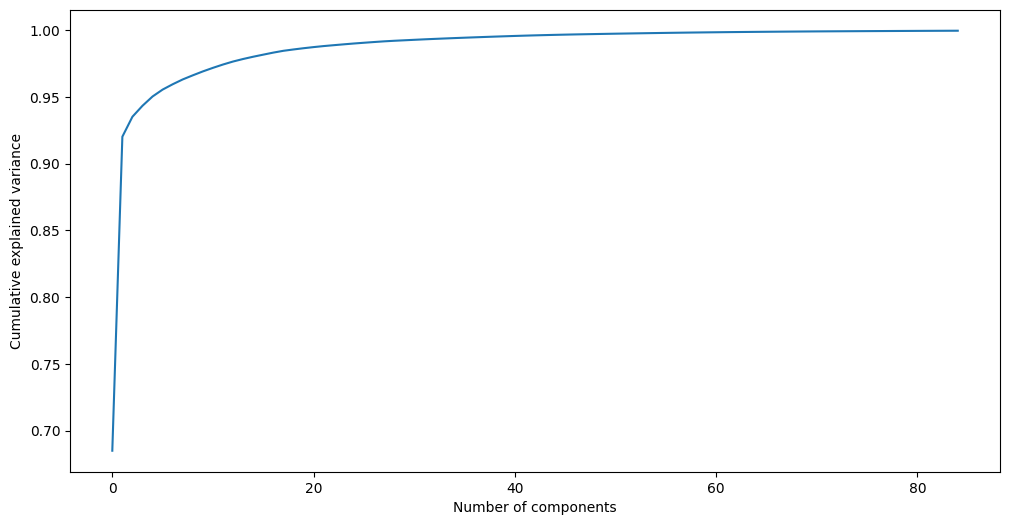

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 85)
principalComponents = pca.fit_transform(df.iloc[:, :-1].values)
ev=pca.explained_variance_ratio_
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


In [ ]:
pca = PCA(n_components = 60)
dt = pca.fit_transform(df.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1,61)]+['class']


In [ ]:
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-52,PC-53,PC-54,PC-55,PC-56,PC-57,PC-58,PC-59,PC-60,class
0,5014.905985,1456.863260,72.697049,71.204926,-435.686985,-68.840318,134.809865,-304.372455,256.432992,-66.630999,...,-1.032209,-18.300260,19.742379,32.297371,26.984843,-23.106878,28.892342,19.163263,-49.655125,3
1,5601.383743,-2023.450087,350.134661,-528.465053,148.088296,-288.359031,202.956862,240.848020,-474.857839,93.493770,...,-10.397939,-25.881314,5.026643,-3.645425,-14.817116,-24.992055,12.537025,-28.155441,-7.936008,3
2,5796.135442,-3090.394852,490.539929,-760.214346,259.933303,-131.611181,172.927304,205.911238,572.491979,-191.622017,...,27.667638,14.029528,25.083124,-3.659828,19.282622,-29.034156,12.474968,-17.108810,-21.913327,3
3,5586.204575,-2369.376085,356.274719,-502.687155,146.554951,-306.679326,251.071095,234.966433,-314.023251,54.962245,...,17.403537,39.742175,12.449474,2.813783,-6.761592,-18.609994,34.511380,0.282998,2.797000,3
4,5020.990792,339.603390,-23.007525,-92.556769,-368.495443,-438.266709,502.715429,-345.536587,-188.352754,-67.506065,...,-1.996203,15.050337,-6.567774,20.757336,-20.553240,1.988184,-11.970548,-30.579624,-10.765783,3


8.	Display the bands after PCA

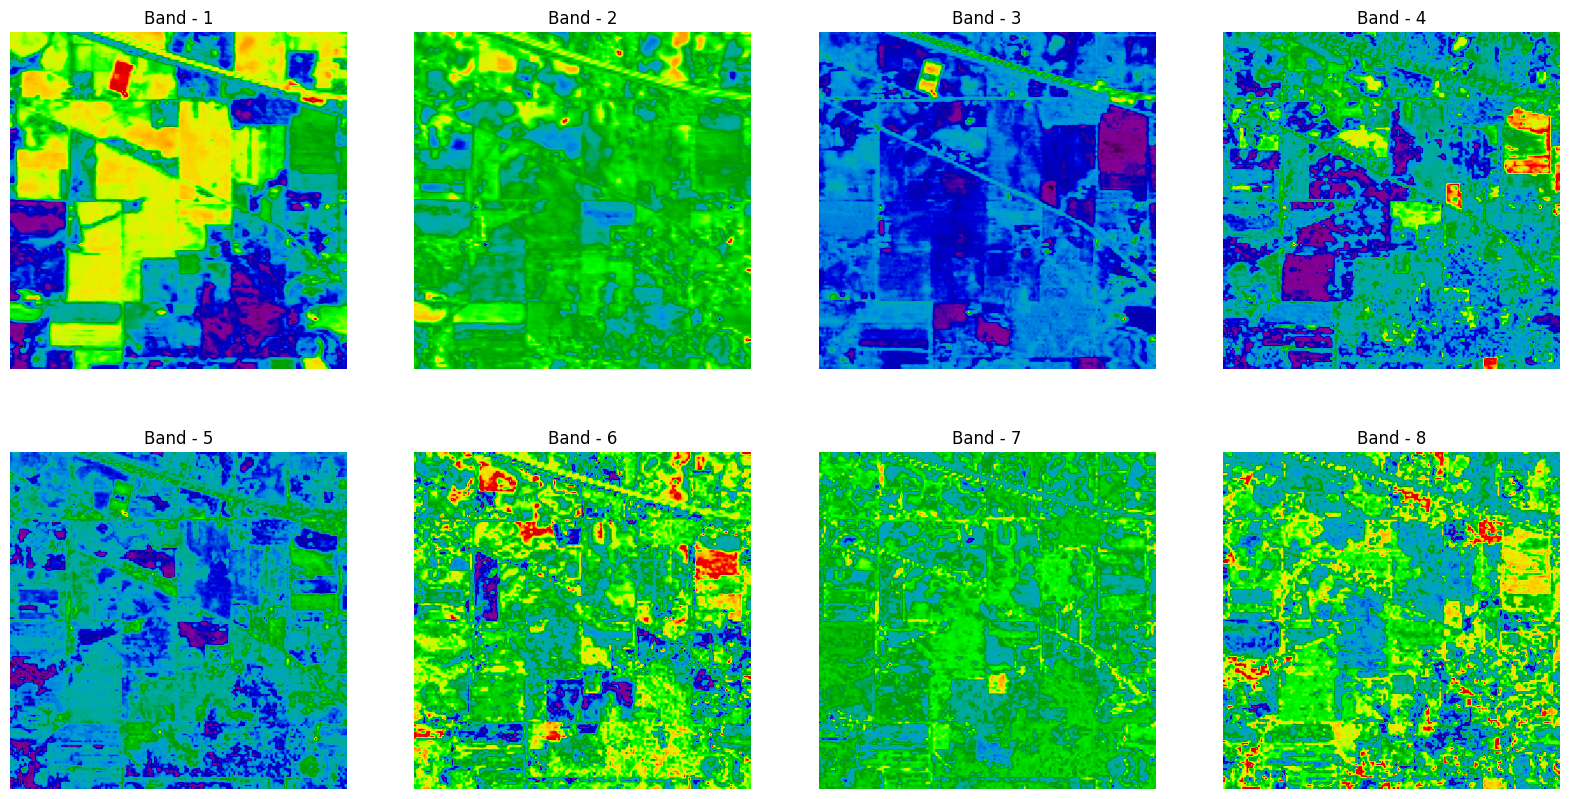

In [ ]:
fig = plt.figure(figsize = (20, 10))
for i in range(1, 1+8):
    fig.add_subplot(2,4, i)
    plt.imshow(q.loc[:, f'PC-{i}'].values.reshape(145, 145), cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {i}')
plt.savefig('IP_PCA_Bands.png')


In [ ]:
# saving to .csv
q.to_csv('IP_40_PCA.csv', index=False)


9.	Support Vector Machine(SVM)

In [ ]:
x = q[q['class'] != 0]
X = x.iloc[:, :-1].values
y = x.loc[:, 'class'].values
names = ['Alfalfa', 'Corn-notill', 'Corn-mintill',  'Corn',   'Grass-pasture','Grass-trees',
'Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill','Soybean-mintill',
'Soybean-clean', 'Wheat', 'Woods',  'Buildings Grass Trees Drives', 'Stone Steel Towers']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)
svm =  SVC(C = 130, kernel = 'rbf', cache_size = 10*1024)
svm.fit(X_train, y_train)
ypred = svm.predict(X_test)


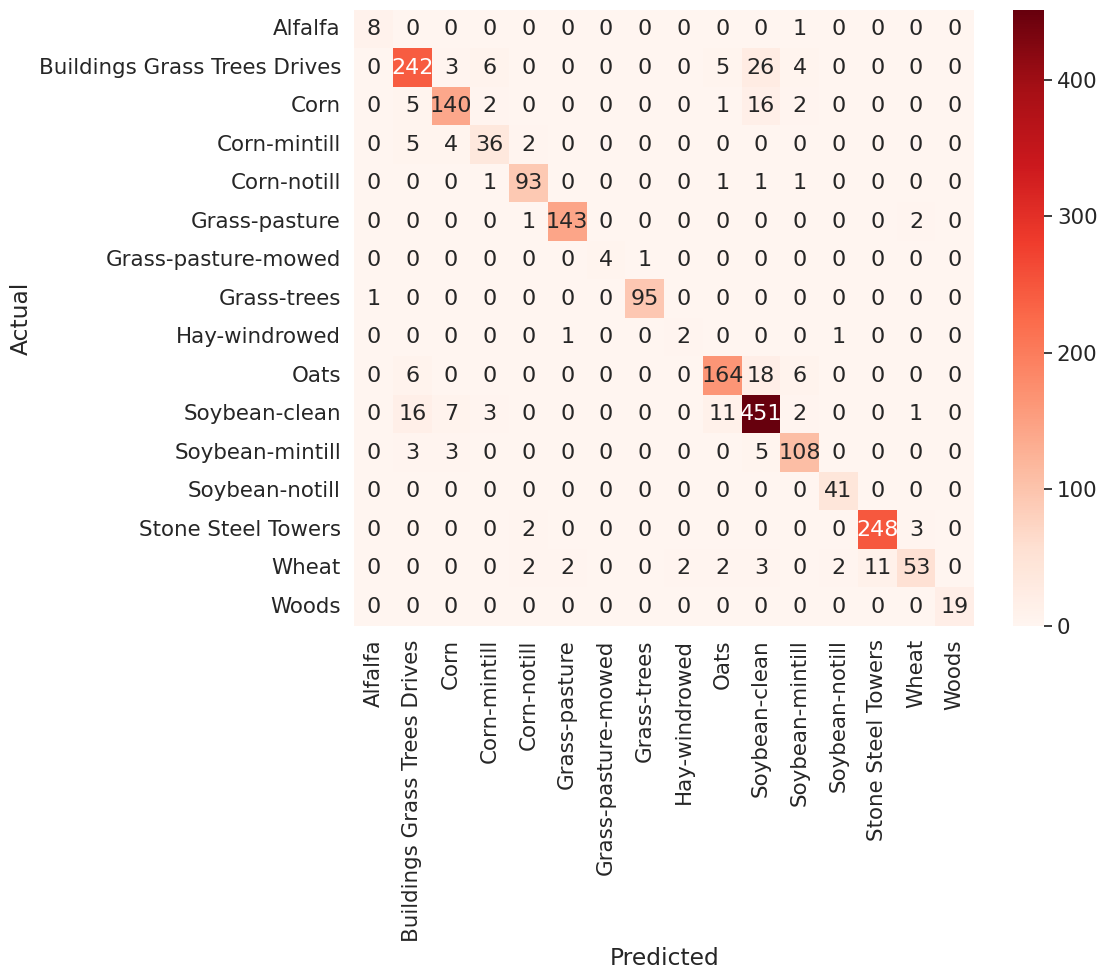

In [ ]:
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=np.unique(names), index = np.unique(names))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16}, fmt='d')
plt.savefig('cmap.png', dpi=300)


In [ ]:
print(classification_report(y_test, ypred, target_names = names))

                              precision    recall  f1-score   support

                     Alfalfa       0.89      0.89      0.89         9
                 Corn-notill       0.87      0.85      0.86       286
                Corn-mintill       0.89      0.84      0.87       166
                        Corn       0.75      0.77      0.76        47
               Grass-pasture       0.93      0.96      0.94        97
                 Grass-trees       0.98      0.98      0.98       146
         Grass-pasture-mowed       1.00      0.80      0.89         5
               Hay-windrowed       0.99      0.99      0.99        96
                        Oats       0.50      0.50      0.50         4
              Soybean-notill       0.89      0.85      0.87       194
             Soybean-mintill       0.87      0.92      0.89       491
               Soybean-clean       0.87      0.91      0.89       119
                       Wheat       0.93      1.00      0.96        41
                   

10.	Classification Map

In [ ]:
l = []
for i in range(q.shape[0]):
    if q.iloc[i, -1] == 0:
        l.append(0)
    else:
        prediction = svm.predict(q.iloc[i, :-1].values.reshape(1, -1))
        l.append(int(prediction[0]))

# Convert l to a NumPy array
clmap = np.array(l).reshape(145, 145).astype('float')


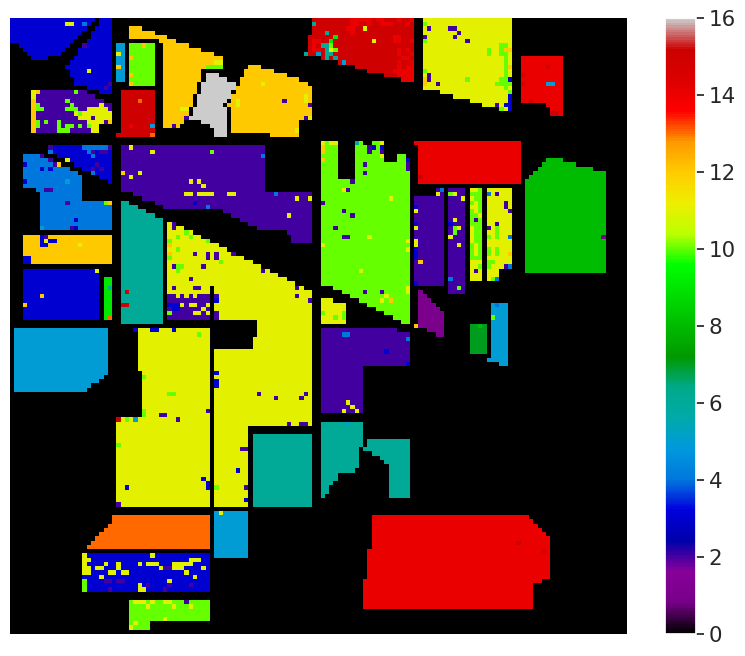

In [ ]:
clmap = np.array(l).reshape(145, 145).astype('float')
plt.figure(figsize=(10, 8))
plt.imshow(clmap, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_cmap.png')
plt.show()
